In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)

/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/costa/anaconda/envs/eden_env/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from toolz import curry, compose

from eden_rna.io.rfam import load
load_rfam = lambda rfam_id, num_seqs: load(rfam_id, seq_ids=range(num_seqs))


from eden_rna.rnaplfold import fold
plfold_params = dict(window_size = 250,
                      max_bp_span = 150,
                      hard_threshold=0.5,
                      avg_bp_prob_cutoff = 0.1,
                      max_num_edges = 2,
                      no_lonely_bps=True,
                      nesting=True)
fold_plfold = curry(fold)(**plfold_params)


from eden.display import draw_graph_set
draw_graph_set_params = dict(n_graphs_per_line=2,
                               size=9,
                               vertex_border=False,
                               vertex_size=200,
                               font_size=9,
                               vertex_alpha=0.6,
                               vertex_color='_label_',
                               colormap='Set3',
                               ignore_for_layout='nesting')
draw_graph_set_rna = curry(draw_graph_set)(**draw_graph_set_params)


draw_structs = compose(draw_graph_set_rna, fold_plfold, load_rfam)

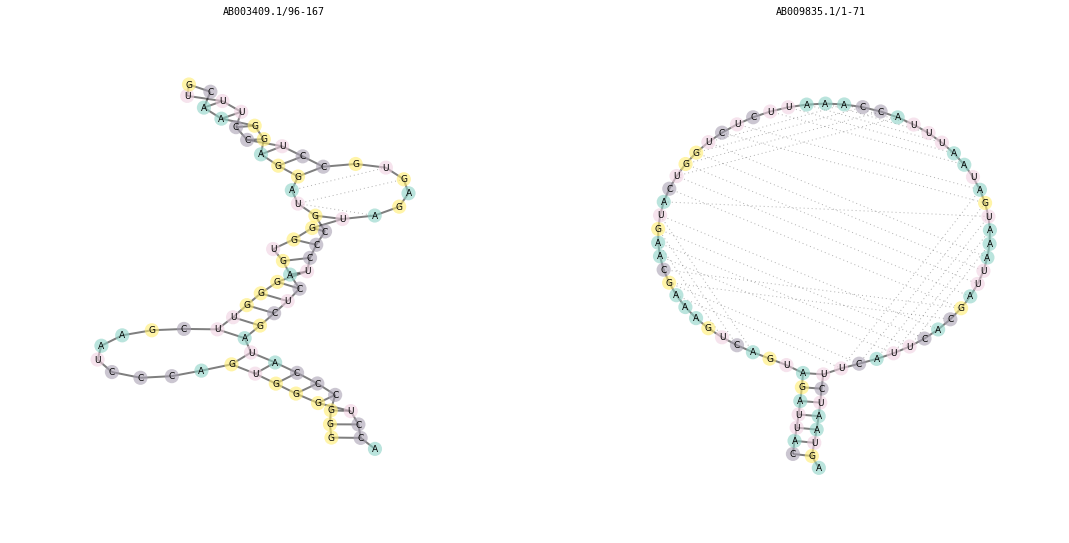

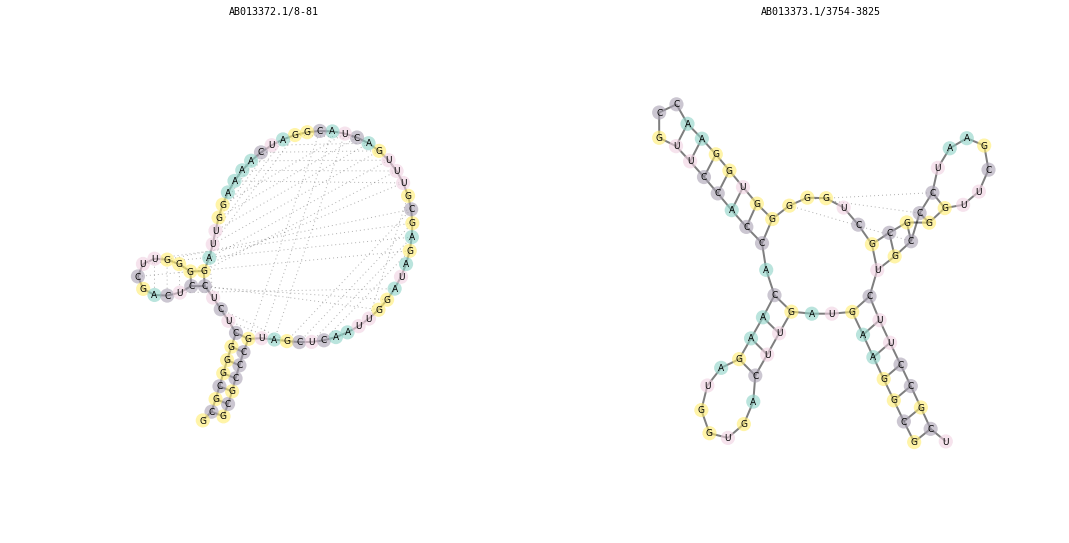

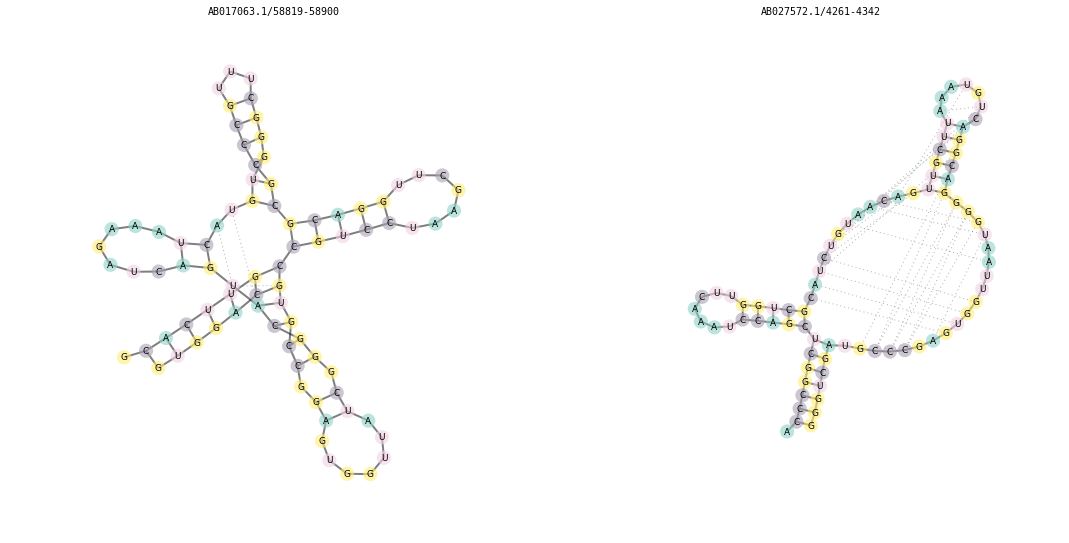

In [3]:
draw_structs('RF00005', 6)

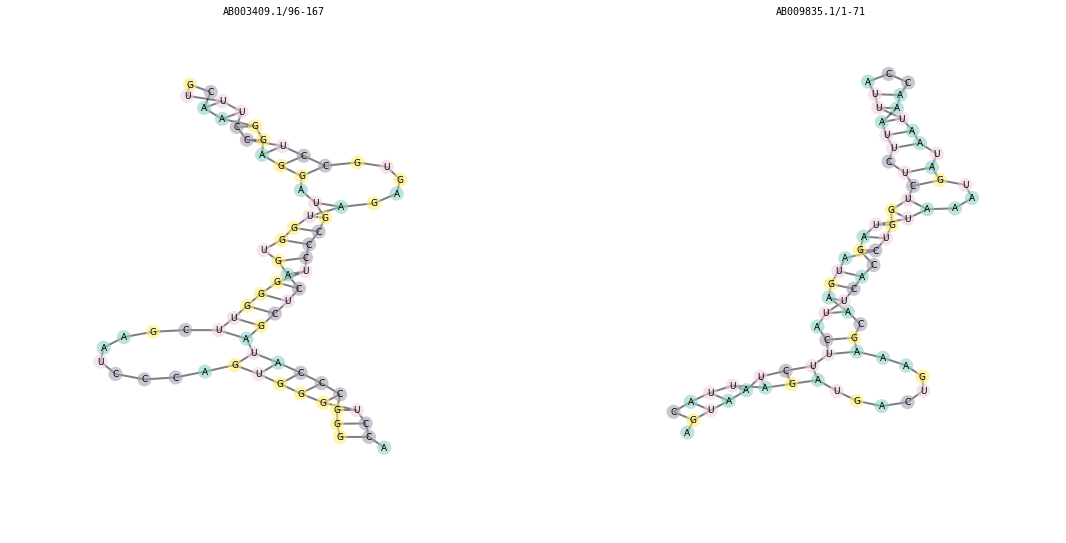

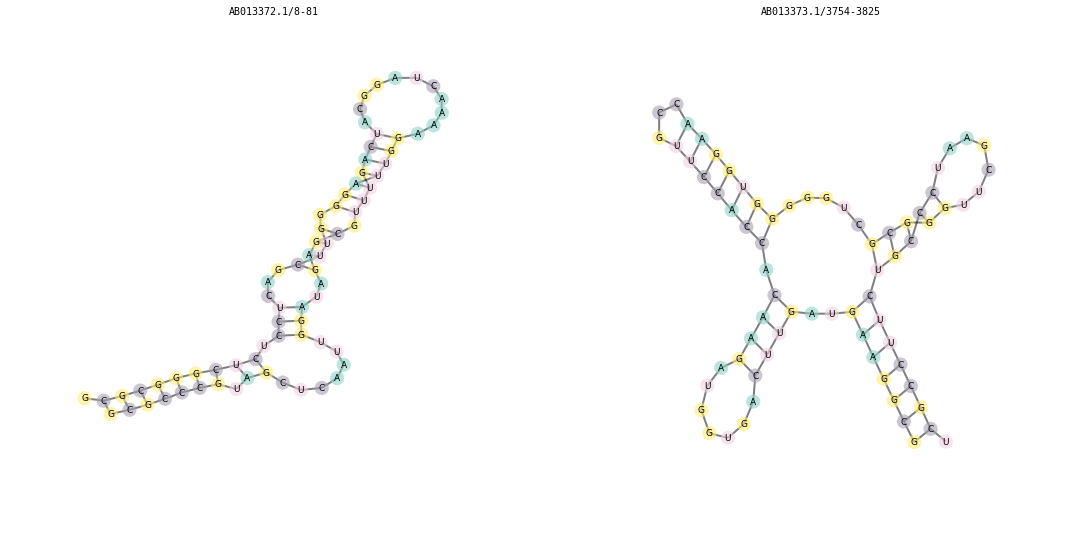

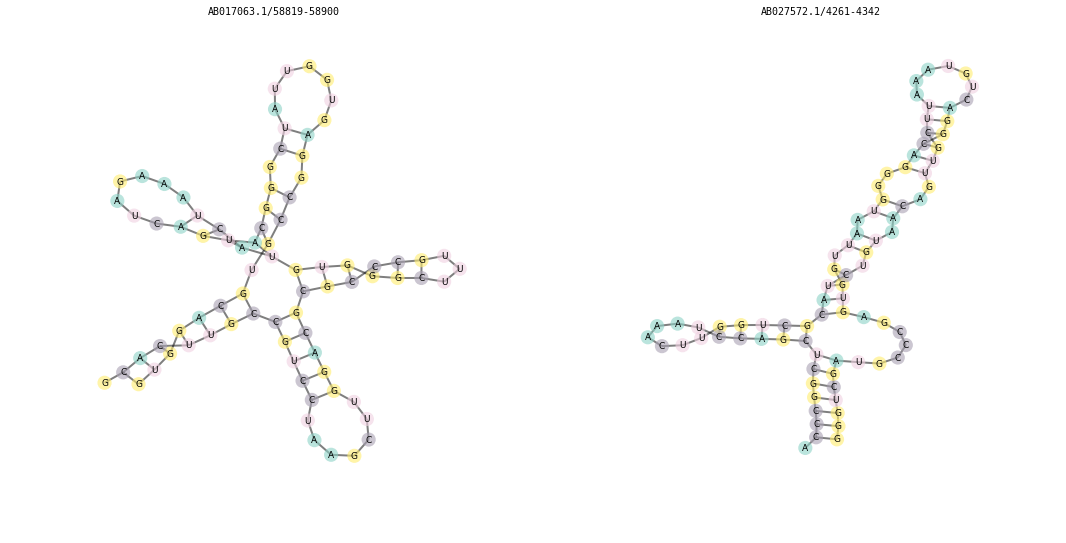

In [4]:
from eden_rna.rnafold import fold
draw_structs = compose(draw_graph_set_rna, fold, load_rfam)
draw_structs('RF00005', 6)

---